In [ ]:
import pandas as pd #principal herramienta de gestion de datasets como dataframe
import numpy as np #para trabajar con arrays y algunas cuestiones estadisticas
from sklearn import preprocessing #procesamiento de detasets 
from sklearn.metrics import mean_squared_error #herramienta estadistica para medir errores
import seaborn as sns #herramienta grafica
sns.set()
from sklearn.model_selection import train_test_split #para separar el dataset en entrenamiento y testeo
from sklearn.tree import DecisionTreeClassifier #modelo de arbol
from sklearn.metrics import confusion_matrix #para crear la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay #para graficar la matriz de confusión
from sklearn.model_selection import GridSearchCV #para optimización de hiperparámetro
import joblib ]#airve para bajar el modelo entrenado y guardarlo como un achivo
from sklearn import tree #modelo de arbol
import matplotlib.pyplot #herramienta grafica
import matplotlib.pyplot as plt #herramienta grafica
from sklearn.model_selection import cross_validate #para validacion cruzada 
from sklearn.metrics import accuracy_score #metrica accuracy
from sklearn.metrics import precision_score #metrica precisión
from sklearn.metrics import recall_score #metrica recall
from sklearn.metrics import f1_score #metrica f1 score
import warnings #evita que se llene de warnings el script
warnings.filterwarnings("ignore", category=FutureWarning) #evita que se llene de warnings el script


In [ ]:
#clono el repositorio

In [ ]:
!git clone https://github.com/soyHenry/Datathon.git

Cloning into 'Datathon'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 83 (delta 15), reused 20 (delta 10), pack-reused 50
Unpacking objects: 100% (83/83), done.


In [ ]:
#ingesto los datos en dataframe de pandas

In [ ]:
df_train=pd.read_csv('Datathon/hospitalizaciones_train.csv')

In [ ]:
df1=df_train.copy() #realizo una copia para trabajar con back up de los datos crudos 

In [ ]:
#creo una funcion para adaptar la columna label a categórica

In [ ]:
def transf_label(df):
    lista_dias=df['Stay (in days)']
    lista_estancia=[]
    for i in lista_dias:
        if i <=8: 
            i=0
        elif i>8:
            i=1
        lista_estancia.append(i)
    array_estancia=np.array(lista_estancia)
    array_estancia.reshape(1,-1)
    array_estancia.shape
    df['estancia']=array_estancia
    df.drop(columns=['Stay (in days)'], inplace=True)
    return df

In [ ]:
#aplico la función

In [ ]:
transf_label(df1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


In [ ]:
#Realizo una transormación de las columnas categoricas a numéricas 
#con label encoder en las no ordinales y ordinal encoder en las que si

In [ ]:
le = preprocessing.LabelEncoder()
df1['Insurance'] = le.fit_transform(df1['Insurance'])
df1['health_conditions'] = le.fit_transform(df1['health_conditions'])
df1['Type of Admission'] = le.fit_transform(df1['Type of Admission'])
df1['gender'] = le.fit_transform(df1['gender'])
df1['doctor_name'] = le.fit_transform(df1['doctor_name'])
df1['Ward_Facility_Code'] = le.fit_transform(df1['Ward_Facility_Code'])
df1['Department'] = le.fit_transform(df1['Department'])

In [ ]:
enc = OrdinalEncoder()
train_df['Age'] = enc.fit_transform(train_df[['Age']])
train_df['Severity of Illness'] = enc.fit_transform(train_df[['Severity of Illness']])

In [ ]:
df2=df1.copy() #se generan 2 data frame con distintas columnas para aplicar el modelo y analizar diferencias 

In [ ]:
df3=df1.copy() #se generan 2 data frame con distintas columnas para aplicar el modelo y analizar diferencias 

In [ ]:
# ACONTINUACIÓN SE PUEDE VER TODOS LOS ARBOLES GENERADOS Y SUS METRICAS CONSIDERANDO DISTINTAS FREATURES 
#_ ESTE PUNTO SE EXPLICA MEJOR EN EL TXT ESTRATEGIA FINAL

y1=df1[['estancia']]
y2=df2[['estancia']]
#TODO _ x=df[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','staff_available','patientid','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
X1=df1[['Department','Age','gender','Admission_Deposit']]
X2=df2[['Department','Age', 'doctor_name']]
'''
--------------0.3
El valor de la precisión para este modelo es de [0.4560795  0.64296281]
El valor de la recall es de [0.25191037 0.81765805]
El valor de accuracy es de 0.6039756097560975
El f1-score es de:[0.32455593 0.71986336], type[0.32455593 0.71986336]
------------0.2
El valor de la precisión para este modelo es de [0.45788829 0.64286926]
El valor de la recall es de [0.25297475 0.81784306]
El valor de accuracy es de 0.6042195121951219
El f1-score es de:[0.32589731 0.7198764 ], type[0.32589731 0.7198764 ]

'''


#X1=df1[['Department','Age', 'doctor_name','gender']]
'''
------------0.3
El valor de la precisión para este modelo es de [0.40814987 0.62924725]
El valor de la recall es de [0.20072325 0.82334113]
El valor de accuracy es de 0.5881788617886179
El f1-score es de:[0.26910424 0.71332684], type[0.26910424 0.71332684]
'''

#X1=df1[['Department','Age', 'doctor_name','gender','Insurance']]
'''
---------0.3
El valor de la precisión para este modelo es de [0.40814987 0.62924725]
El valor de la recall es de [0.20072325 0.82334113]
El valor de accuracy es de 0.5881788617886179
El f1-score es de:[0.26910424 0.71332684], type[0.26910424 0.71332684]

'''

#X1=df1[['Department']]
'''
-------------0.3
El valor de la precisión para este modelo es de [0.36356172 0.61923465]
El valor de la recall es de [0.17155649 0.81772337]
El valor de accuracy es de 0.5736666666666667
El f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]
-------------0.2
El valor de la precisión para este modelo es de [0.36266978 0.61846282]
El valor de la recall es de [0.17048789 0.81778423]
El valor de accuracy es de 0.5729878048780488
El f1-score es de:[0.23194192 0.70429268], type[0.23194192 0.70429268]
'''
#con todo menos ID
#X1=df1[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','staff_available','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
''' 
---------------0.3
El valor de la precisión para este modelo es de [0.39985609 0.6287695 ]
El valor de la recall es de [0.23923198 0.78207021]
El valor de accuracy es de 0.5770406504065041
El f1-score es de:[0.29935894 0.69709109], type[0.29935894 0.69709109]
-----0.2
El valor de la precisión para este modelo es de [0.39985609 0.6287695 ]
El valor de la recall es de [0.23923198 0.78207021]
El valor de accuracy es de 0.5770406504065041
El f1-score es de:[0.29935894 0.69709109], type[0.29935894 0.69709109]
'''
# con todo menos id - staff available 
#X1=df1[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
'''
El valor de la precisión para este modelo es de [0.36356172 0.61923465]
El valor de la recall es de [0.17155649 0.81772337]
El valor de accuracy es de 0.5736666666666667
El f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]
'''

'\nEl valor de la precisión para este modelo es de [0.36356172 0.61923465]\nEl valor de la recall es de [0.17155649 0.81772337]\nEl valor de accuracy es de 0.5736666666666667\nEl f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]\n'

In [ ]:
#realizo la primera partición de los datos, luego se hará una validación cruzada

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=20) 

# datos, dejo un 30% para testear

print(X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(287000, 3) (287000, 1) (123000, 3) (123000, 1)


In [ ]:
#COMO PUEDE VERSE ESTO SE RELIZA DOS VECES PORQUE SE ESTAN RELIZANDO 2 ARBOLES CON DISTINTA CANTIDAD DE FEATURES CADA UNO 
#PARA COMPARAR SU EFICACIA EN DETECCION DE FALSOS POSITIVOS, ESTE FUE UN PUNTO FLOJO A SOLUCIONAR DURANTE EL PROCESO DE MODELADO

In [ ]:
#realizo la primera partición de los datos, luego se hará una validación cruzada

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=20) 

# datos, dejo un 30% para testear

print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(287000, 3) (287000, 1) (123000, 3) (123000, 1)


In [ ]:
#CON EL SIGUIENTE CODIGO SE DESARROLLO UN ENSAYO DEL HIOPERARÁMETRO OPTIMO CON VALIDACIÓN CRUZADA 

In [ ]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,8,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X1, y1, cv=3, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

In [ ]:
#tube que modificar los parámetros porque estaba overfitting, por eso la particion es de cv=3

In [ ]:
#a continuación se grafica el accuracy en base a los distintos niveles de profundidad del arbol

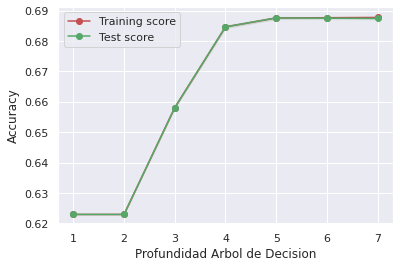

In [ ]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()


In [ ]:
#se guarda un archivo con el modelo entrenado 

In [ ]:
joblib.dump(clf,'Arbol_entrenado_Colab')

['Arbol_entrenado_Colab']

In [ ]:
#nuevo arbol para subir el accuracy
clf2 = DecisionTreeClassifier(max_depth=5)
clf2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#se predice con el nuevo arbol

In [ ]:
y2_train_pred = clf2.predict(X2_train)
y2_test_pred = clf2.predict(X2_test)

In [ ]:
#medición de metricas 

In [ ]:
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y2_test,y2_test_pred))
print("Recall: ", metrics.recall_score(y2_test,y2_test_pred))
print("F1score:", metrics.f1_score(y2_test,y2_test_pred))

accuracy:  0.688260162601626
Recall:  0.9999869727208776
F1score: 0.8001521895489562


In [ ]:
#analisis de las mismas metricas pero en comparación con el valor supuesto (enh los bloques se comprar ambos arboles con distintos features)

In [ ]:
#EXACTITUD
exactitud = accuracy_score(y2_test, y2_test_pred)

#PRECISION
precision = precision_score(y2_test, y2_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y2_test, y2_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y2_test, y2_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')

El valor de la precisión para este modelo es de [0.99987335 0.66688386]
El valor de la recall es de [0.170747   0.99998697]
El valor de accuracy es de 0.688260162601626
El f1-score es de:[0.2916836  0.80015219], type[0.2916836  0.80015219]


In [ ]:
#EXACTITUD
exactitud = accuracy_score(y1_test, y1_test_pred)

#PRECISION
precision = precision_score(y1_test, y1_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y1_test, y1_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y1_test, y1_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')

El valor de la precisión para este modelo es de [0.99987335 0.66688386]
El valor de la recall es de [0.170747   0.99998697]
El valor de accuracy es de 0.688260162601626
El f1-score es de:[0.2916836  0.80015219], type[0.2916836  0.80015219]


In [ ]:
#Se ensayo con validación cruzada 

In [ ]:
from sklearn.model_selection import cross_validate
#clf2_scores = cross_validate(clf2, X1, y1, cv=5, scoring = ['accuracy'])

In [ ]:
#se reliza la predicció del primer arbol pero con la valización cruzada 

In [ ]:
y1_train_pred=clf2.predict(X1_train)
y1_test_pred = clf2.predict(X1_test)


In [ ]:
#y se vuelven a medir la metricas

In [ ]:
#EXACTITUD
exactitud = accuracy_score(y1_test, y1_test_pred)

#PRECISION
precision = precision_score(y1_test, y1_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y1_test, y1_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y1_test, y1_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')

El valor de la precisión para este modelo es de [0.99987335 0.66688386]
El valor de la recall es de [0.170747   0.99998697]
El valor de accuracy es de 0.688260162601626
El f1-score es de:[0.2916836  0.80015219], type[0.2916836  0.80015219]


In [ ]:
#se desarrolla y grafica la matriz de confusion para comprender donde hay margen para subrir el accuracy y que debemos sacrificar

In [ ]:
#MATRIZ

In [ ]:
matrix = confusion_matrix(y1_train, y1_train_pred)
matrix_2 = confusion_matrix(y1_test, y1_test_pred)

In [ ]:
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


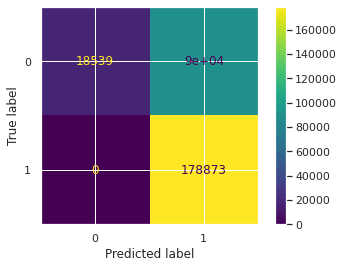

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
#se observa que el modelo funciona muy bien para los valores de entrenamiento pero tiene MUCHISIMOS falsos positivos en el muestreo 

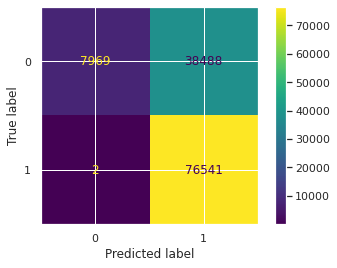

In [ ]:
cm_display_2.plot()
plt.show()

In [ ]:
#se grafica el arbol para analizar los valores de gini de las ramas y optimizar el mismo

[Text(0.5, 0.9166666666666666, 'X[1] <= 4.5\ngini = 0.47\nsamples = 328000\nvalue = [123573, 204427]'),
 Text(0.4230769230769231, 0.75, 'X[0] <= 1.5\ngini = 0.494\nsamples = 277794\nvalue = [123573, 154221]'),
 Text(0.23076923076923078, 0.5833333333333334, 'X[0] <= 0.5\ngini = 0.048\nsamples = 21628\nvalue = [529, 21099]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[1] <= 2.5\ngini = 0.126\nsamples = 7849\nvalue = [529, 7320]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 2120\nvalue = [0, 2120]'),
 Text(0.23076923076923078, 0.25, 'X[1] <= 3.5\ngini = 0.168\nsamples = 5729\nvalue = [529, 5200]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.244\nsamples = 2916\nvalue = [414, 2502]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.078\nsamples = 2813\nvalue = [115, 2698]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 13779\nvalue = [0, 13779]'),
 Text(0.6153846153846154, 0.5833333333333334, 'X[0] <= 2.5\ngini = 0.499\nsa

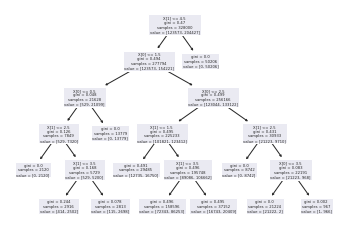

In [ ]:
tree.plot_tree(clf2.fit(X1_train, y1_train))

In [ ]:
joblib.dump(clf2,'Arbol_entrenado_2_Colab')

['Arbol_entrenado_2_Colab']

In [ ]:
#se guarda el segundo arbol entrenado 